
Tarea Semana 15 Métodos Computacionales 1

a)


100%|██████████| 99999/99999 [00:02<00:00, 34712.25it/s]


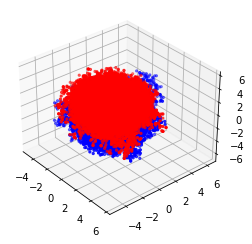

U(2) = -2.0183939262094377

b)


100%|██████████| 99999/99999 [00:03<00:00, 31469.55it/s]


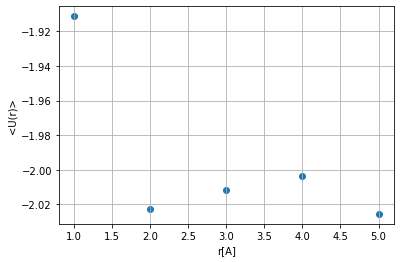

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
from matplotlib import rc
from tqdm import tqdm

def funcion_de_onda( R, r):
    x = -(np.linalg.norm(r-R))
    return ((np.e**x)*(1/np.sqrt(np.pi)))**2


def U(r1,r2,R1,R2):
    r1 = np.array(r1)
    r2 = np.array(r2)
    if (np.linalg.norm(r1-r2) == 0) or (np.linalg.norm(R1-R2) == 0) or (np.linalg.norm(r1-R1) == 0) or (np.linalg.norm(r2-R1) == 0) or (np.linalg.norm(r1-R2) == 0) or (np.linalg.norm(r2-R2) == 0):
        c = 0
    else:
        c=((1/np.linalg.norm(r1-r2)) + (1/np.linalg.norm(R1-R2)) - (1/np.linalg.norm(r1-R1)) -( 1/np.linalg.norm(r2-R1)) - (1/np.linalg.norm(r1 - R2)) - (1/np.linalg.norm(r2-R2)))
    return c

def Metropolis(funcion_de_onda, R , d = 3 , NSteps = int(1e5), delta = 1.0):
    
    x = np.zeros( (NSteps, d) )
    x[0]=np.array([0,0,0]) # punto de arrenque 
    
    for i in tqdm(range(1,NSteps)):
        
        x[i,:] = x[i-1,:] + (np.random.random(d)-0.5)*delta
        
        present = funcion_de_onda( x[i-1,:], R )
        future = funcion_de_onda( x[i,:],R )
        
        # probabilidad de aceptacion
        alpha = np.minimum(1., future/present)
        
        g = np.random.rand()
        
        if g < alpha:
            x[i,:] = x[i,:]
        else:
            x[i,:] = x[i-1,:]
            
    return x

def Potencial(e1 ,e2 ,R1, R2 ):
    suma=0
    for i in range(len(e1)):
        suma+= U(e1[i,:] ,e2[i,:] ,R1, R2)
    
    return suma/len(e1)

def main():
    print(f'\nTarea Semana 15 Métodos Computacionales 1')
    
    #a
    print(f'\na)')

    L=2
    R1=[0,0,L/2]
    R2=[0,0,-L/2]
    R1=np.array(R1)
    R2=np.array(R2)

    e1=Metropolis(funcion_de_onda, R1, d=3)
    e2=Metropolis(funcion_de_onda, R2, d=3)

    fig = plt.figure()
    ax = fig.add_subplot(1,1,1, projection = '3d',elev = 32, azim = -40)
    ax.scatter(e2[:,0],e2[:,1],e2[:,2],marker='.',color='b')
    ax.scatter(e1[:,0],e1[:,1],e1[:,2],marker='.',color='r')
    ax.scatter(0,0,0,marker='o',color='k',s=100)
    plt.show()

    Promedio = Potencial(e1 ,e2 ,R1, R2 )
    print(f'U(2) = {Promedio}')


    # b)
    print(f'\nb)')
    
    sep = np.linspace(1.0,5.0,5) 

    potenciales = []
    for l in sep:
        R1=[0,0,l/2]
        R2=[0,0,-l/2]
        R1=np.array(R1)
        R2=np.array(R2)
        e1=Metropolis(funcion_de_onda, R1, d=3)
        e2=Metropolis(funcion_de_onda, R2, d=3)
        potenciales.append(Potencial(e1,e2,R1,R2))
        
    fig1 = plt.figure()
    ax1 = fig1.add_subplot()
    ax1.scatter(sep, potenciales)
    ax1.set_ylabel('<U(r)>')
    ax1.set_xlabel('r[A]')
    ax1.grid()
    plt.show()
    
if __name__ == '__main__':
    main()
    